In [42]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
life_expectancy = pd.read_csv("life_expectancy.csv")
life_expectancy

,geo,child_mortality_0_5_year_olds_dying_per_1000_born,children_and_elderly_per_100_adults,children_per_woman_total_fertility,children_per_woman_total_fertility_with_projections,crude_death_rate_deaths_per_1000_population,income_per_person_gdppercapita_ppp_inflation_adjusted,population_growth_annual_percent_with_projections,population_total,life_expectancy_sex_ratio,population_sex_ratio,life_expectancy_years
0,afg,65.924,80.353,4.33,3.941,6.443,1867.0,2.309,36373176.0,0.958807,1.062219,58.69
1,ago,81.638,98.221,5.55,5.367,8.243,5846.0,3.255,30774205.0,0.911825,0.962679,65.19
2,arg,10.620,56.313,2.26,2.113,7.557,18942.0,0.930,44688864.0,0.907896,0.958863,76.97
3,arm,12.920,44.200,1.60,1.744,9.688,8662.0,0.107,2934152.0,0.918373,0.888299,75.97
4,aus,3.398,53.564,1.83,1.872,6.695,45783.0,1.288,24772247.0,0.956382,0.992728,82.87
...,...,...,...,...,...,...,...,...,...,...,...,...
194,grd,14.630,50.986,2.06,2.062,7.094,13505.0,0.462,108339.0,0.935144,1.009945,71.86
195,kir,52.532,64.731,3.57,2.801,6.944,1888.0,1.702,118414.0,0.905009,0.972727,62.23
196,syc,12.674,45.796,2.25,2.074,8.330,27546.0,0.507,95235.0,0.885215,0.971965,74.23
197,fsm,32.766,60.715,3.05,3.055,6.235,3409.0,0.677,106227.0,0.965438,1.052121,65.80


In [35]:
# Getting rid of the 'time' column, since we're only dealing with 1 year now.

gapminder.drop(columns="time", inplace=True)

In [36]:
# Excluding columns with >15% missing (NaN) values

gapminder = gapminder.loc[:, gapminder.isnull().mean() <= 0.15]
gapminder

,geo,child_mortality_0_5_year_olds_dying_per_1000_born,children_and_elderly_per_100_adults,children_per_woman_total_fertility,children_per_woman_total_fertility_with_projections,crude_death_rate_deaths_per_1000_population,female_population_with_projections,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_at_birth_with_projections,life_expectancy_female,life_expectancy_male,life_expectancy_years,male_population_with_projections,population_density_per_square_km,population_growth_annual_percent_with_projections,population_total
0,afg,65.924,80.353,4.33,3.941,6.443,17637881.0,1867.0,58.69,65.812,63.101,58.69,18735288.0,55.71359,2.309,36373176.0
1,ago,81.638,98.221,5.55,5.367,8.243,15679689.0,5846.0,65.19,64.939,59.213,65.19,15094515.0,24.68453,3.255,30774205.0
2,arg,10.620,56.313,2.26,2.113,7.557,22813673.0,18942.0,76.97,80.572,73.151,76.97,21875185.0,16.32953,0.930,44688864.0
3,arm,12.920,44.200,1.60,1.744,9.688,1553857.0,8662.0,75.97,77.952,71.589,75.97,1380289.0,103.06119,0.107,2934152.0
4,aus,3.398,53.564,1.83,1.872,6.695,12431320.0,45783.0,82.87,85.102,81.390,82.87,12340925.0,3.22459,1.288,24772247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,fsm,32.766,60.715,3.05,3.055,6.235,51764.0,3409.0,65.80,70.655,68.213,65.80,54462.0,151.75286,0.677,106227.0
230,tkl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.90000,NaN,1319.0
231,sxm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1192.70588,NaN,40552.0
232,hos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1820.45455,NaN,801.0


In [37]:
# creating two new features: life_expectancy_sex_ratio and population_sex_ratio

gapminder["life_expectancy_sex_ratio"] = gapminder["life_expectancy_male"] / gapminder["life_expectancy_female"]
gapminder["population_sex_ratio"] = gapminder["male_population_with_projections"] / gapminder["female_population_with_projections"]

C:\Users\lenna\AppData\Local\Temp/ipykernel_18620/315439379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gapminder["life_expectancy_sex_ratio"] = gapminder["life_expectancy_male"] / gapminder["life_expectancy_female"]
C:\Users\lenna\AppData\Local\Temp/ipykernel_18620/315439379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gapminder["population_sex_ratio"] = gapminder["male_population_with_projections"] / gapminder["female_population_with_projections"]


In [38]:
# Putting the target variable (life expectancy) on the far right of the dataframe, to make our life easier

life_expectancy = gapminder.pop("life_expectancy_years")
gapminder = pd.concat([gapminder, life_expectancy], axis=1)

In [39]:
gapminder.drop(columns=["life_expectancy_at_birth_with_projections", "life_expectancy_female", 
                        "life_expectancy_male",
                       "population_density_per_square_km", "female_population_with_projections", 
                        "male_population_with_projections"], inplace=True)

In [40]:
# Excluding rows with >80% missing (NaN) values

gapminder.dropna(thresh=round(0.8*len(gapminder.columns)), inplace=True)

In [41]:
# Dropping rows has messed up our index, which goes up to 233 now despite there only being 198 rows. Not a huge issue,
# but I prefer resetting the index in cases like these, to make it go from 0 up to (number of rows - 1)

gapminder.reset_index(inplace=True, drop=True)
gapminder.to_csv("life_expectancy.csv", index=False)

In [20]:
# Scaling so that the minimum value in each column is 0 and the maximum in each column is 1.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(gapminder.iloc[:, 1:])
gapminder.iloc[:, 1:] = scaler.transform(gapminder.iloc[:, 1:])

In [12]:
# Allowing for wide plots
from IPython.display import display, HTML
CSS = """div.output_area img {max-width:None !important;max-height: None !important";}"""
display(HTML('<style>{}</style>'.format(CSS)))

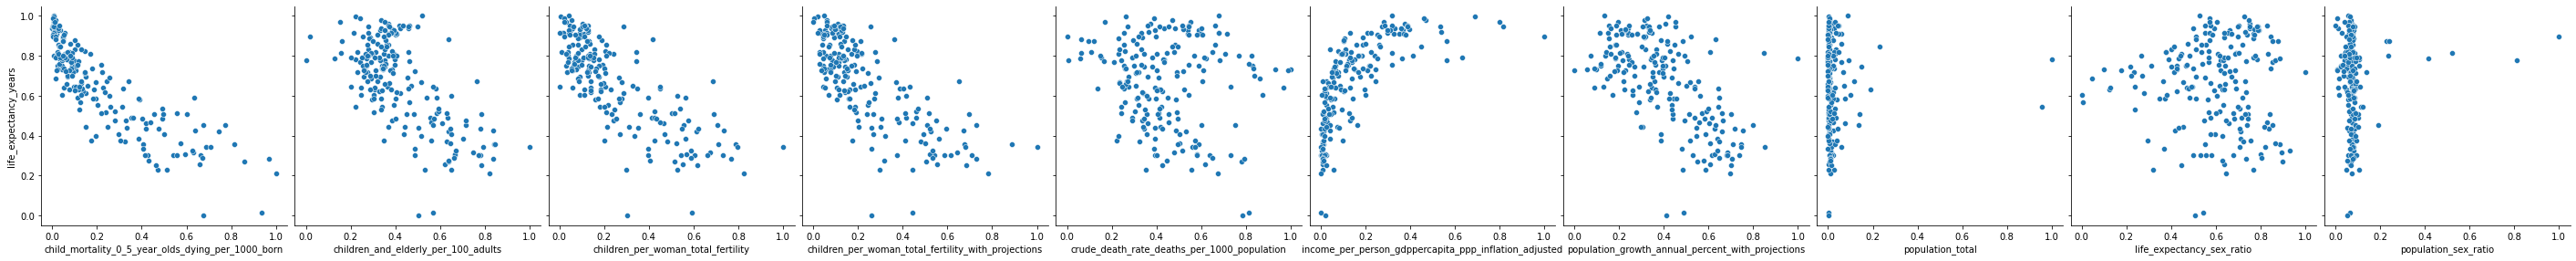

In [169]:
sns.pairplot(data=gapminder,
            x_vars=gapminder.columns[1:-1],
             y_vars=gapminder.columns[-1], height=4)

In [170]:
# Imputing missing values (if I haven't discussed this in the last workshop yet, I will in the next one).
# Here, missing values are imputed using the K-Nearest Neighbors algorithm. As you can imagine, this is often better
# than simply imputing with the mean, median or mode of the column.

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3).fit(gapminder.iloc[:,1:])
gapminder.iloc[:,1:] = imputer.transform(gapminder.iloc[:,1:])

In [171]:
# Splitting the data into train and test. When testing models, also try changing the random_state to a different 
# number, to see how much your results can vary depending on how the values are split.

gm_features_train, gm_features_test, gm_target_train, gm_target_test = train_test_split(gapminder.iloc[:,1:-1],
                                                                                       gapminder.iloc[:,-1],
                                                                                       random_state=99)

In [188]:
# Good luck! I've created a simple k-NN regression model below to help you get started.
# Feel free to use the Canvas discussion board to share what you've done, or to ask questions if you get stuck.

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(gm_features_train, gm_target_train)

print("Test set score: {:.2f}".format(knn.score(gm_features_train, gm_target_train)))
print("Test set score: {:.2f}".format(knn.score(gm_features_test, gm_target_test)))

Test set score: 0.86
Test set score: 0.85
